## JWST F1280W 30Dor ERO

Data is setup in a subdirectory that is given in the filter variable below (i.e., "F560W"). Inside this directory, there should be 4 subdirectories called stage0, stage1, stage2, and stage3. The uncal (raw) fits files should be in the stage0 directory.

Author: Karl Gordon

Last modified: 20 Jul 2022

Based on JWebbinar notebooks by Bryan Hilbert, MIRI simulated notebooks by Mattia Libralato, input from various MIRI team members, and input from the jwst pipeline developers.

Uses custom code given in helpers subdirectory.

Extensively tested on MIRI ERO mosaics.

### Variables controling processing and display

In [1]:
filter = "F1280W"
fwhm = 3.7
basename = "jw0272900200"

crval = [84.69695784078512, -69.09492271266589]
# rotation = 0.0
# crval = None
rotation = None

# shifts determine from previous runs with treakreg or with other filters
#   analysis using Analyze_teakreg_shifts.ipynb
#   run this notebook after running shortest wavelength dataset with tweakreg=True and align_to_gaia=True
#     and setting all the tile?_shifts to [0.0, 0.0]
#   use the resulting shifts here and set tweakreg=False and align_to_gaia=False
#tile1_shifts = [0.0, 0.0]
#tile2_sfhits = [0.0, 0.0]
#tweakreg = True
#align_to_gaia = True
tile1_shifts = [0.2342195515193774, -0.9316779689106902]
tile2_shifts = [0.7884962280416655, -0.09212854823862968]
tweakreg = False
align_to_gaia = False

# only needed if multiple datasets combined that are taken separately (e.g., weeks apart)
matchbkg = False

# display range for uncalibrated images
drange_raw = [100., 3000.]
# display range for calibrated images
drange_cal = [200., 3000.]
dmap = "afmhot"  # same as ds9 bb

# specify the linearity file to use if default not desired
# linfile = ""
linfile = None

# specify the flat file to use if default not desired
flatfile = None

run_detector1 = True
run_image2 = True
run_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image, overlay_catalog
from helpers.miri_helpers import miri_detector1, miri_image2, miri_image3
from helpers.miri_clean import fix_rateints_to_rate, shift_cal_wcs

In [7]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d


In [8]:
import stcal
print(stcal.__version__)

1.0.1.dev2+g6262cda


In [9]:
# create stage directories if they do not exist
for k in range(4):
    cpath = f"./{filter}/stage{k}"
    if not os.path.exists(cpath):
        os.makedirs(cpath)

## CALWEBB_DETECTOR1

In [10]:
miri_uncal_files = glob.glob(f"./{filter}/stage0/*uncal.fits")
output_dir = f'./{filter}/stage1'
print(miri_uncal_files)

['./F1280W/stage0/jw02729002001_02105_00006_mirimage_uncal.fits', './F1280W/stage0/jw02729002002_02105_00004_mirimage_uncal.fits', './F1280W/stage0/jw02729002002_02105_00007_mirimage_uncal.fits', './F1280W/stage0/jw02729002001_02105_00001_mirimage_uncal.fits', './F1280W/stage0/jw02729002001_02105_00003_mirimage_uncal.fits', './F1280W/stage0/jw02729002001_02105_00009_mirimage_uncal.fits', './F1280W/stage0/jw02729002002_02105_00009_mirimage_uncal.fits', './F1280W/stage0/jw02729002002_02105_00002_mirimage_uncal.fits', './F1280W/stage0/jw02729002002_02105_00001_mirimage_uncal.fits', './F1280W/stage0/jw02729002001_02105_00008_mirimage_uncal.fits', './F1280W/stage0/jw02729002002_02105_00006_mirimage_uncal.fits', './F1280W/stage0/jw02729002001_02105_00010_mirimage_uncal.fits', './F1280W/stage0/jw02729002001_02105_00004_mirimage_uncal.fits', './F1280W/stage0/jw02729002002_02105_00010_mirimage_uncal.fits', './F1280W/stage0/jw02729002002_02105_00003_mirimage_uncal.fits', './F1280W/stage0/jw02729

In [11]:
if run_detector1:
    miri_detector1(miri_uncal_files, output_dir, linfile=linfile)

2022-07-20 14:46:34,277 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-20 14:46:34,278 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-20 14:46:34,279 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-20 14:46:34,280 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-20 14:46:34,280 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-20 14:46:34,281 - stpipe 

./F1280W/stage0/jw02729002001_02105_00006_mirimage_uncal.fits


2022-07-20 14:46:34,392 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1280W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'saturation': {'pre_hooks': [], 'post_hooks': [], 'output_file':

2022-07-20 14:46:38,302 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-20 14:46:38,303 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-20 14:46:38,305 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-20 14:46:38,396 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(4, 12, 1024, 1032) from jw02729002001_02105_00006_mirimage_uncal.fits>,).
2022-07-20 14:46:38,397 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:46:38,416 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/mir

2022-07-20 14:46:46,070 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-20 14:46:46,070 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-20 14:46:46,071 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-20 14:46:46,071 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-20 14:46:46,071 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-20 14:46:46,072 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-20 14:46:46,072 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-20 14:46:46,072 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-20 14:46:46,073 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-20 14:46:46,520 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-20 14:46:47,685 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:46:47,689 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:46:47,691 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:46:47,701 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:46:47,704 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 993 pixels with at least one CR from five groups.
2022-07-20 14:46:47,705 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 14:46:47,706 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from thre

2022-07-20 14:46:48,121 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1851 pixels with at least one CR from five groups.
2022-07-20 14:46:48,122 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-20 14:46:48,123 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-20 14:46:48,145 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:46:48,154 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:46:48,161 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:46:48,177 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:46:48,187 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 871 pixels with at least one CR from five groups.
2022-07-20 14:46:48,189 -

2022-07-20 14:46:48,746 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:46:48,747 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:46:49,129 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:46:49,143 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:46:49,196 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1943 pixels with at least one CR from five groups.
2022-07-20 14:46:49,197 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-20 14:46:49,197 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:46:49,215 - stpipe.Detector1Pipeline.jump -

2022-07-20 14:46:58,042 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-20 14:46:58,043 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-20 14:46:58,043 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-20 14:46:58,044 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-20 14:46:58,045 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-20 14:46:58,046 - stpipe 

./F1280W/stage0/jw02729002002_02105_00004_mirimage_uncal.fits


2022-07-20 14:47:00,059 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02105_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:47:00,062 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:47:00,063 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:47:00,064 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:47:00,065 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:47:04,522 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:47:04,541 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:47:05,171 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:47:05,268 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002002_02105_00004_mirimage_uncal.fits>,).
2022-07-20 14:47:05,269 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:47:09,623 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 824 pixels with at least one CR from five groups.
2022-07-20 14:47:09,624 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 14:47:09,625 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 14:47:09,643 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:47:09,697 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:47:09,701 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:47:09,706 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1071 pixels with at least one CR from f

2022-07-20 14:47:10,131 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 738 pixels with at least one CR from five groups.
2022-07-20 14:47:10,132 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:47:10,132 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:47:10,133 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:47:10,133 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:47:10,174 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:47:10,176 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:47:10,178 - stpipe.Detector1Pipeline.jump - I

2022-07-20 14:47:10,670 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:47:10,671 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:47:10,700 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 702 pixels with at least one CR from five groups.
2022-07-20 14:47:10,702 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-20 14:47:10,702 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from three groups.
2022-07-20 14:47:10,751 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:47:10,799 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:47:10,817 - stpipe.Detector1Pipeline.jump - I

2022-07-20 14:47:17,247 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:47:17,248 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:47:17,384 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:47:17,489 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00004_mirimage_uncal.fits>,).
2022-07-20 14:47:17,490 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:47:17,524 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-20 14:47:17,524 - stpipe.De

2022-07-20 14:47:19,829 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 14:47:19,830 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-20 14:47:19,830 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-20 14:47:19,831 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02729002002_02105_00007_mirimage_uncal.fits


2022-07-20 14:47:21,671 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02105_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:47:21,676 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:47:21,678 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:47:21,679 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:47:21,680 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:47:26,160 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:47:26,178 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:47:26,793 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:47:26,891 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002002_02105_00007_mirimage_uncal.fits>,).
2022-07-20 14:47:26,892 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:47:31,205 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:47:31,209 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 723 pixels with at least one CR from five groups.
2022-07-20 14:47:31,210 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:47:31,211 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 14:47:31,253 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:47:31,304 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:47:31,310 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:47:31,314 - stpipe.Detector1Pipeline.

2022-07-20 14:47:31,760 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:47:31,760 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:47:31,764 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2046 pixels with at least one CR from five groups.
2022-07-20 14:47:31,765 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-20 14:47:31,766 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from three groups.
2022-07-20 14:47:31,815 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 836 pixels with at least one CR from five groups.
2022-07-20 14:47:31,815 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-20 14:47:32,240 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 14:47:32,240 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-20 14:47:32,302 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 590 pixels with at least one CR from five groups.
2022-07-20 14:47:32,303 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-20 14:47:32,303 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:47:32,334 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:47:32,340 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:47:32,401 - stpipe.Detector1Pipeline.jump - I

2022-07-20 14:47:37,837 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:47:37,839 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:47:38,084 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:47:38,086 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:47:38,225 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:47:38,227 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:47:38,351 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:47:38,353 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:47:38,490 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:47:38,596 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<I

2022-07-20 14:47:40,819 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 14:47:40,820 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:47:40,820 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:47:40,821 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1280W/stage0/jw02729002001_02105_00001_mirimage_uncal.fits


2022-07-20 14:47:42,704 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02105_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:47:42,708 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:47:42,710 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:47:42,710 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:47:42,711 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:47:46,971 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:47:46,989 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:47:47,568 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:47:47,666 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002001_02105_00001_mirimage_uncal.fits>,).
2022-07-20 14:47:47,667 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:47:51,828 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:47:51,842 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:47:51,845 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 863 pixels with at least one CR from five groups.
2022-07-20 14:47:51,846 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-20 14:47:51,847 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 16 pixels with at least one CR from three groups.
2022-07-20 14:47:51,884 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:47:51,898 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Run

2022-07-20 14:47:52,247 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-20 14:47:52,248 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from three groups.
2022-07-20 14:47:52,247 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-20 14:47:52,277 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 863 pixels with at least one CR from five groups.
2022-07-20 14:47:52,278 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:47:52,279 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:47:52,302 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, 

2022-07-20 14:47:52,840 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-20 14:47:52,882 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:47:52,948 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1891 pixels with at least one CR from five groups.
2022-07-20 14:47:52,949 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:47:52,950 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 14:47:52,961 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:47:52,977 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:47:52,982 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:47:53,029 - s

2022-07-20 14:47:58,916 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:47:58,964 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:47:58,966 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:47:58,986 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:47:58,988 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:47:59,295 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:47:59,297 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:47:59,434 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:47:59,542 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002001_02105_00001_mirimage_uncal.fits>,).
2022-07-20 14:47:59,543 - stp

2022-07-20 14:48:01,743 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:48:01,743 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:48:01,744 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 14:48:01,744 - stpipe.Detector1Pipeline

./F1280W/stage0/jw02729002001_02105_00003_mirimage_uncal.fits


2022-07-20 14:48:03,637 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02105_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:48:03,641 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:48:03,642 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:48:03,642 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:48:03,643 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:48:07,942 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:48:07,960 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:48:08,534 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:48:08,635 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002001_02105_00003_mirimage_uncal.fits>,).
2022-07-20 14:48:08,636 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:48:12,852 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 974 pixels with at least one CR from five groups.
2022-07-20 14:48:12,853 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-20 14:48:12,854 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 14:48:12,870 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:48:12,909 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:48:12,915 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:48:12,918 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 737 pixels with at least one CR from fi

2022-07-20 14:48:13,293 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 14:48:13,293 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2163 pixels with at least one CR from five groups.
2022-07-20 14:48:13,294 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:48:13,294 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-20 14:48:13,295 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-20 14:48:13,296 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:48:13,301 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:48:13,301 - stpipe.Detector1Pipeline.jump - 

2022-07-20 14:48:13,787 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 14:48:13,788 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 14:48:13,809 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 832 pixels with at least one CR from five groups.
2022-07-20 14:48:13,810 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:48:13,811 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:48:13,846 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 712 pixels with at least one CR from five groups.
2022-07-20 14:48:13,847 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-20 14:48:19,912 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:48:19,914 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:48:20,281 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:48:20,283 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:48:20,393 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:48:20,395 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:48:20,532 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:48:20,642 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002001_02105_00003_mirimage_uncal.fits>,).
2022-07-20 14:48:20,643 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-07-20 14:48:22,810 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:48:22,811 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 14:48:22,812 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 14:48:22,813 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02729002001_02105_00009_mirimage_uncal.fits


2022-07-20 14:48:24,707 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02105_00009_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:48:24,711 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:48:24,713 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:48:24,714 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:48:24,715 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:48:29,033 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:48:29,051 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:48:29,623 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:48:29,726 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002001_02105_00009_mirimage_uncal.fits>,).
2022-07-20 14:48:29,727 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:48:33,924 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:48:33,940 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-20 14:48:33,935 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:48:33,938 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 720 pixels with at least one CR from five groups.
2022-07-20 14:48:33,939 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 14:48:33,985 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:48:33,993 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:48:33,995 - stpipe.Detector1Pipeline.

2022-07-20 14:48:34,359 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 965 pixels with at least one CR from five groups.
2022-07-20 14:48:34,360 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:48:34,361 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:48:34,361 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:48:34,363 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2329 pixels with at least one CR from five groups.
2022-07-20 14:48:34,365 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-20 14:48:34,366 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three grou

2022-07-20 14:48:34,893 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:48:34,895 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:48:34,899 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 863 pixels with at least one CR from five groups.
2022-07-20 14:48:34,900 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:48:34,900 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:48:34,943 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:48:34,960 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 686 pixels with at least one CR from five groups.
2022-07-20 14:48:34,961 - stpipe.Detector1Pipeline.jump -

2022-07-20 14:48:40,951 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:48:40,953 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:48:41,145 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:48:41,145 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:48:41,147 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:48:41,147 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:48:41,297 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:48:41,409 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002001_02105_00009_mirimage_uncal.fits>,).
2022-07-20 14:48:41,412 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-07-20 14:48:43,574 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:48:43,575 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 14:48:43,576 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 14:48:43,577 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02729002002_02105_00009_mirimage_uncal.fits


2022-07-20 14:48:45,411 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02105_00009_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:48:45,414 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:48:45,416 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:48:45,417 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:48:45,418 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:48:49,839 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:48:49,858 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:48:50,443 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:48:50,549 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002002_02105_00009_mirimage_uncal.fits>,).
2022-07-20 14:48:50,550 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:48:54,834 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:48:54,837 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1018 pixels with at least one CR from five groups.
2022-07-20 14:48:54,838 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 14:48:54,884 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:48:54,898 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 14:48:54,894 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 1

2022-07-20 14:48:55,249 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-20 14:48:55,250 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-20 14:48:55,253 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:48:55,265 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:48:55,277 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 770 pixels with at least one CR from five groups.
2022-07-20 14:48:55,278 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:48:55,279 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:48:55,282 - stpipe.Detector1Pipeline.jump - 

2022-07-20 14:48:55,747 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:48:55,771 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 671 pixels with at least one CR from five groups.
2022-07-20 14:48:55,772 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:48:55,773 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:48:55,880 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:48:55,901 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:48:55,958 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 689 pixels with at least one CR from five groups.
2022-07-20 14:48:55,959 - stpipe.Detector1Pipeline.jump -

2022-07-20 14:49:01,626 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:49:01,628 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:49:01,637 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:49:01,639 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:49:01,771 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:49:01,772 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:49:01,911 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:49:02,026 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00009_mirimage_uncal.fits>,).
2022-07-20 14:49:02,027 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-07-20 14:49:04,243 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:49:04,244 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 14:49:04,244 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 14:49:04,245 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02729002002_02105_00002_mirimage_uncal.fits


2022-07-20 14:49:06,102 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02105_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:49:06,106 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:49:06,106 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:49:06,107 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:49:06,108 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:49:10,439 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:49:10,459 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:49:11,034 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:49:11,140 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002002_02105_00002_mirimage_uncal.fits>,).
2022-07-20 14:49:11,141 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:49:15,508 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:49:15,511 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 697 pixels with at least one CR from five groups.
2022-07-20 14:49:15,512 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-20 14:49:15,555 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:49:15,563 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:49:15,572 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:49:15,575 - stpipe.Detector1Pipeline.jump - INFO - From high

2022-07-20 14:49:15,926 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:49:15,960 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:49:15,963 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1977 pixels with at least one CR from five groups.
2022-07-20 14:49:15,964 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four groups.
2022-07-20 14:49:15,965 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-20 14:49:15,972 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 800 pixels with at least one CR from five groups.
2022-07-20 14:49:1

2022-07-20 14:49:16,509 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:49:16,517 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:49:16,559 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:49:16,562 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 761 pixels with at least one CR from five groups.
2022-07-20 14:49:16,563 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 14:49:16,564 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:49:16,573 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 681 pixels with at least one CR from five groups.
2022-07-20 14:49:16,574 - stpipe.Detector1Pipeline.jump -

2022-07-20 14:49:22,048 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:49:22,319 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:49:22,321 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:49:22,384 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:49:22,386 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:49:22,528 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:49:22,643 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00002_mirimage_uncal.fits>,).
2022-07-20 14:49:22,644 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-07-20 14:49:24,867 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:49:24,868 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 14:49:24,868 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 14:49:24,869 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02729002002_02105_00001_mirimage_uncal.fits


2022-07-20 14:49:26,781 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02105_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:49:26,785 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:49:26,786 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:49:26,786 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:49:26,787 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:49:31,214 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:49:31,232 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:49:31,823 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:49:31,931 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002002_02105_00001_mirimage_uncal.fits>,).
2022-07-20 14:49:31,932 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:49:36,272 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:49:36,275 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 749 pixels with at least one CR from five groups.
2022-07-20 14:49:36,276 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-20 14:49:36,320 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:49:36,335 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:49:36,330 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14

2022-07-20 14:49:36,688 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:49:36,724 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:49:36,728 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1981 pixels with at least one CR from five groups.
2022-07-20 14:49:36,730 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 23 pixels with at least one CR from four groups.
2022-07-20 14:49:36,731 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from three groups.
2022-07-20 14:49:36,740 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 688 pixels with at least one CR from five groups.
2022-07-20 14:49:36,741 - stpipe.Detector1Pipeline.jump - INFO - From highest

2022-07-20 14:49:37,248 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:49:37,312 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 889 pixels with at least one CR from five groups.
2022-07-20 14:49:37,313 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:49:37,313 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:49:37,351 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:49:37,363 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:49:37,415 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 689 pixels with at least one CR from five groups.
2022-07-20 14:49:37,417 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with a

2022-07-20 14:49:43,011 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:49:43,012 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:49:43,281 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:49:43,283 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:49:43,443 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:49:43,444 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:49:43,586 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:49:43,703 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00001_mirimage_uncal.fits>,).
2022-07-20 14:49:43,706 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-07-20 14:49:45,995 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:49:45,996 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 14:49:45,996 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 14:49:45,997 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02729002001_02105_00008_mirimage_uncal.fits


2022-07-20 14:49:47,938 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02105_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:49:47,941 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:49:47,943 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:49:47,943 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:49:47,945 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:49:52,366 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:49:52,384 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:49:52,970 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:49:53,078 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002001_02105_00008_mirimage_uncal.fits>,).
2022-07-20 14:49:53,079 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:49:57,398 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:49:57,402 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1221 pixels with at least one CR from five groups.
2022-07-20 14:49:57,403 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:49:57,403 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from three groups.
2022-07-20 14:49:57,403 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:49:57,445 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:49:57,468 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:49:57,476 - stpipe.Detector1Pipelin

2022-07-20 14:49:57,910 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:49:57,920 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 856 pixels with at least one CR from five groups.
2022-07-20 14:49:57,921 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-20 14:49:57,922 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:49:57,925 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 893 pixels with at least one CR from five groups.
2022-07-20 14:49:57,926 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 14:49:57,925 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:49:57,927 - stpipe.Detector1Pipeline.jump - 

2022-07-20 14:49:58,416 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:49:58,417 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:49:58,426 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:49:58,478 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1091 pixels with at least one CR from five groups.
2022-07-20 14:49:58,479 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:49:58,480 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:49:58,493 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1974 pixels with at least one CR from five gro

2022-07-20 14:50:04,677 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:50:04,679 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:50:04,679 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:50:04,681 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:50:04,875 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:50:04,877 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:50:04,886 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:50:04,887 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:50:05,028 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:50:05,145 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<I

2022-07-20 14:50:07,582 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 14:50:07,583 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:50:07,583 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:50:07,584 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1280W/stage0/jw02729002002_02105_00006_mirimage_uncal.fits


2022-07-20 14:50:09,610 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02105_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:50:09,614 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:50:09,615 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:50:09,616 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:50:09,616 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:50:13,990 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:50:14,008 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:50:14,582 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:50:14,691 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002002_02105_00006_mirimage_uncal.fits>,).
2022-07-20 14:50:14,692 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:50:18,917 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:50:18,921 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 768 pixels with at least one CR from five groups.
2022-07-20 14:50:18,921 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-20 14:50:18,955 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:50:18,970 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:50:18,973 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 765 pixels with at least one CR from five groups.
2022-07-20 1

2022-07-20 14:50:19,378 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 703 pixels with at least one CR from five groups.
2022-07-20 14:50:19,379 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:50:19,380 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-20 14:50:19,404 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 583 pixels with at least one CR from five groups.
2022-07-20 14:50:19,405 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-20 14:50:19,406 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 14:50:19,406 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-20 14:50:19,827 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 14:50:19,827 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 14:50:19,852 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 916 pixels with at least one CR from five groups.
2022-07-20 14:50:19,853 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 14:50:19,854 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-20 14:50:19,866 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:50:19,931 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 919 pixels with at least one CR from five grou

2022-07-20 14:50:25,962 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:50:25,964 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:50:26,019 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:50:26,021 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:50:26,046 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:50:26,048 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:50:26,244 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:50:26,245 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:50:26,384 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:50:26,501 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<I

2022-07-20 14:50:28,696 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 14:50:28,696 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:50:28,696 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:50:28,697 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1280W/stage0/jw02729002001_02105_00010_mirimage_uncal.fits


2022-07-20 14:50:30,572 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02105_00010_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:50:30,576 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:50:30,577 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:50:30,577 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:50:30,578 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:50:34,958 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:50:34,977 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:50:35,553 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:50:35,663 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002001_02105_00010_mirimage_uncal.fits>,).
2022-07-20 14:50:35,664 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:50:39,891 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1199 pixels with at least one CR from five groups.
2022-07-20 14:50:39,891 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 14:50:39,892 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 14:50:39,925 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:50:39,967 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:50:39,971 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 699 pixels with at least one CR from five groups.
2022-07-20 14:50:39,970 - stpipe.Detector1Pipeline.jump - INFO - Working on int

2022-07-20 14:50:40,373 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:50:40,376 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:50:40,379 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2421 pixels with at least one CR from five groups.
2022-07-20 14:50:40,380 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-20 14:50:40,380 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-20 14:50:40,391 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 949 pixels with at least one CR from five groups.
2022-07-20 14:50:40,392 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-20 14:50:40,957 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:50:40,963 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 709 pixels with at least one CR from five groups.
2022-07-20 14:50:40,964 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-20 14:50:40,965 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:50:41,022 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 791 pixels with at least one CR from five groups.
2022-07-20 14:50:41,023 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:50:41,024 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three group

2022-07-20 14:50:47,223 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:50:47,329 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:50:47,331 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:50:47,466 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:50:47,468 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:50:47,611 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:50:47,730 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002001_02105_00010_mirimage_uncal.fits>,).
2022-07-20 14:50:47,733 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-07-20 14:50:49,895 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:50:49,896 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 14:50:49,896 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 14:50:49,897 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02729002001_02105_00004_mirimage_uncal.fits


2022-07-20 14:50:51,705 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02105_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:50:51,708 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:50:51,709 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:50:51,710 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:50:51,712 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:50:56,097 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:50:56,116 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:50:56,690 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:50:56,801 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002001_02105_00004_mirimage_uncal.fits>,).
2022-07-20 14:50:56,802 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:51:00,990 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:51:01,011 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-20 14:51:01,006 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:51:01,009 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 872 pixels with at least one CR from five groups.
2022-07-20 14:51:01,010 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-20 14:51:01,047 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:51:01,071 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from thre

2022-07-20 14:51:01,456 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-20 14:51:01,468 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 673 pixels with at least one CR from five groups.
2022-07-20 14:51:01,469 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:51:01,471 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:51:01,480 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 821 pixels with at least one CR from five groups.
2022-07-20 14:51:01,481 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:51:01,481 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four group

2022-07-20 14:51:01,978 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:51:01,978 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:51:01,987 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:51:02,004 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 857 pixels with at least one CR from five groups.
2022-07-20 14:51:02,005 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:51:02,006 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:51:02,053 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 851 pixels with at least one CR from five group

2022-07-20 14:51:08,344 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:51:08,346 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:51:08,355 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:51:08,357 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:51:08,568 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:51:08,570 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:51:09,145 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:51:09,146 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:51:09,288 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:51:09,407 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<I

2022-07-20 14:51:11,541 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 14:51:11,541 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:51:11,542 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:51:11,543 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1280W/stage0/jw02729002002_02105_00010_mirimage_uncal.fits


2022-07-20 14:51:13,371 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02105_00010_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:51:13,374 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:51:13,375 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:51:13,376 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:51:13,377 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:51:17,820 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:51:17,839 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:51:18,410 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:51:18,521 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002002_02105_00010_mirimage_uncal.fits>,).
2022-07-20 14:51:18,522 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:51:22,758 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:51:22,761 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 782 pixels with at least one CR from five groups.
2022-07-20 14:51:22,762 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 14:51:22,796 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:51:22,819 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-20 14:51:22,814 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14

2022-07-20 14:51:23,197 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 920 pixels with at least one CR from five groups.
2022-07-20 14:51:23,198 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:51:23,199 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-20 14:51:23,199 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:51:23,200 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:51:23,203 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2023 pixels with at least one CR from five groups.
2022-07-20 14:51:23,204 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-20 14:51:23,703 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:51:23,768 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 750 pixels with at least one CR from five groups.
2022-07-20 14:51:23,769 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:51:23,769 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:51:23,796 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:51:23,853 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:51:23,853 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:51:23,894 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 856 pixels with at least one CR from five groups.
2022-07-20 14:51:23,895 - s

2022-07-20 14:51:29,884 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:51:29,886 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:51:29,992 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:51:29,993 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:51:30,244 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:51:30,246 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:51:30,387 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:51:30,507 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00010_mirimage_uncal.fits>,).
2022-07-20 14:51:30,511 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-07-20 14:51:32,707 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:51:32,707 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 14:51:32,708 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 14:51:32,709 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02729002002_02105_00003_mirimage_uncal.fits


2022-07-20 14:51:34,655 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02105_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:51:34,659 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:51:34,660 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:51:34,661 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:51:34,662 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:51:39,126 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:51:39,145 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:51:39,721 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:51:39,833 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002002_02105_00003_mirimage_uncal.fits>,).
2022-07-20 14:51:39,834 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:51:44,109 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:51:44,112 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 943 pixels with at least one CR from five groups.
2022-07-20 14:51:44,113 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:51:44,158 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:51:44,170 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:51:44,173 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 812 pixels with at least one CR from five groups.
2022-07-20 1

2022-07-20 14:51:44,585 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 813 pixels with at least one CR from five groups.
2022-07-20 14:51:44,585 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:51:44,586 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:51:44,587 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 14:51:44,604 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:51:44,619 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 692 pixels with at least one CR from five groups.
2022-07-20 14:51:44,620 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four group

2022-07-20 14:51:45,093 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:51:45,115 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 845 pixels with at least one CR from five groups.
2022-07-20 14:51:45,116 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-20 14:51:45,117 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-20 14:51:45,124 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:51:45,145 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 793 pixels with at least one CR from five groups.
2022-07-20 14:51:45,146 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four group

2022-07-20 14:51:51,089 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:51:51,157 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:51:51,159 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:51:51,336 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:51:51,338 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:51:51,478 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:51:51,600 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00003_mirimage_uncal.fits>,).
2022-07-20 14:51:51,603 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 

2022-07-20 14:51:53,855 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:51:53,856 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 14:51:53,857 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 14:51:53,858 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02729002002_02105_00005_mirimage_uncal.fits


2022-07-20 14:51:55,703 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02105_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:51:55,706 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:51:55,707 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:51:55,708 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:51:55,710 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:52:00,188 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:52:00,207 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:52:00,778 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:52:00,891 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002002_02105_00005_mirimage_uncal.fits>,).
2022-07-20 14:52:00,892 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:52:05,198 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 907 pixels with at least one CR from five groups.
2022-07-20 14:52:05,199 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 14:52:05,230 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:52:05,252 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:52:05,261 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:52:05,264 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 868 pixels with at least one CR from five groups.
2022-07-20 14:52:05,265 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from fou

2022-07-20 14:52:05,698 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1952 pixels with at least one CR from five groups.
2022-07-20 14:52:05,699 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-20 14:52:05,699 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:52:05,699 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-20 14:52:05,708 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 852 pixels with at least one CR from five groups.
2022-07-20 14:52:05,709 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 834 pixels with at least one CR from five groups.
2022-07-20 14:52:05,709 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four gr

2022-07-20 14:52:06,203 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:52:06,238 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:52:06,302 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 563 pixels with at least one CR from five groups.
2022-07-20 14:52:06,303 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-20 14:52:06,304 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-20 14:52:06,340 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:52:06,365 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:52:06,376 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:52:06,407 - st

2022-07-20 14:52:12,524 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:52:12,526 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:52:12,669 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:52:12,791 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00005_mirimage_uncal.fits>,).
2022-07-20 14:52:12,792 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:52:12,826 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-20 14:52:12,826 - stpipe.De

2022-07-20 14:52:14,991 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 14:52:14,992 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-20 14:52:14,993 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-20 14:52:14,993 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1280W/stage0/jw02729002001_02105_00005_mirimage_uncal.fits


2022-07-20 14:52:16,834 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02105_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:52:16,837 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:52:16,838 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:52:16,839 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:52:16,840 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:52:21,301 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:52:21,319 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:52:21,905 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:52:22,019 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002001_02105_00005_mirimage_uncal.fits>,).
2022-07-20 14:52:22,021 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:52:26,278 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:52:26,295 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:52:26,298 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 813 pixels with at least one CR from five groups.
2022-07-20 14:52:26,299 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-20 14:52:26,299 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from three groups.
2022-07-20 14:52:26,333 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:52:26,352 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Run

2022-07-20 14:52:26,694 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:52:26,701 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:52:26,707 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:52:26,740 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 894 pixels with at least one CR from five groups.
2022-07-20 14:52:26,741 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:52:26,742 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:52:26,741 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:52:26,769 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 792 pixels with 

2022-07-20 14:52:27,275 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:52:27,290 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:52:27,310 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:52:27,333 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:52:27,346 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1880 pixels with at least one CR from five groups.
2022-07-20 14:52:27,348 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-20 14:52:27,348 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-20 14:52:27,358 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 786 pixels with at least one CR from five groups.
2022-07-20 14:52:27,359 - 

2022-07-20 14:52:33,133 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:52:33,134 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:52:33,514 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:52:33,516 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:52:34,082 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:52:34,084 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:52:34,227 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:52:34,349 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002001_02105_00005_mirimage_uncal.fits>,).
2022-07-20 14:52:34,353 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-07-20 14:52:36,499 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:52:36,500 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 14:52:36,501 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 14:52:36,501 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02729002002_02105_00008_mirimage_uncal.fits


2022-07-20 14:52:38,342 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02105_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:52:38,345 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:52:38,346 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:52:38,347 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:52:38,348 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:52:42,809 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:52:42,828 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:52:43,404 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:52:43,519 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002002_02105_00008_mirimage_uncal.fits>,).
2022-07-20 14:52:43,520 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:52:47,839 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 758 pixels with at least one CR from five groups.
2022-07-20 14:52:47,840 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 14:52:47,840 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:52:47,893 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:52:47,892 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:52:47,901 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:52:47,905 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 901 pixels with at least one CR from fi

2022-07-20 14:52:48,270 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 848 pixels with at least one CR from five groups.
2022-07-20 14:52:48,271 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 14:52:48,271 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:52:48,298 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:52:48,301 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1992 pixels with at least one CR from five groups.
2022-07-20 14:52:48,302 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from four groups.
2022-07-20 14:52:4

2022-07-20 14:52:48,894 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:52:48,894 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:52:48,918 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 923 pixels with at least one CR from five groups.
2022-07-20 14:52:48,919 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:52:48,920 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:52:48,930 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 952 pixels with at least one CR from five groups.
2022-07-20 14:52:48,931 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, t

2022-07-20 14:52:54,502 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:52:54,504 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:52:54,739 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:52:54,740 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:52:54,821 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:52:54,822 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:52:54,966 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:52:55,090 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00008_mirimage_uncal.fits>,).
2022-07-20 14:52:55,093 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'po

2022-07-20 14:52:57,358 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:52:57,360 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-20 14:52:57,360 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-20 14:52:57,362 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1280W/stage0/jw02729002001_02105_00002_mirimage_uncal.fits


2022-07-20 14:52:59,406 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02105_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:52:59,410 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:52:59,411 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:52:59,412 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:52:59,414 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:53:03,965 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:53:03,984 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:53:04,577 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:53:04,693 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002001_02105_00002_mirimage_uncal.fits>,).
2022-07-20 14:53:04,694 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:53:09,051 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:53:09,061 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:53:09,064 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 765 pixels with at least one CR from five groups.
2022-07-20 14:53:09,065 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-20 14:53:09,065 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-20 14:53:09,099 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:53:09,112 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:53:09,125 - stpipe.Detector1Pipeline.

2022-07-20 14:53:09,482 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-20 14:53:09,483 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 14:53:09,496 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:53:09,500 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-20 14:53:09,512 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 680 pixels with at least one CR from five groups.
2022-07-20 14:53:09,513 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:53:09,518 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:53:09,524 - stpipe.Detector1Pipeline.jump - I

2022-07-20 14:53:10,008 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:53:10,009 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:53:10,044 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:53:10,098 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:53:10,108 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1093 pixels with at least one CR from five groups.
2022-07-20 14:53:10,109 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:53:10,110 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:53:10,147 - stpipe.Detector1Pipeline.jump - 

2022-07-20 14:53:16,111 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:53:16,388 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:53:16,390 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:53:16,461 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:53:16,463 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:53:16,481 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:53:16,483 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:53:16,707 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:53:16,709 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:53:16,855 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14

2022-07-20 14:53:19,131 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-20 14:53:19,131 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-20 14:53:19,132 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-20 14:53:19,133 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1280W/stage0/jw02729002001_02105_00007_mirimage_uncal.fits


2022-07-20 14:53:20,989 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02105_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-20 14:53:20,992 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-20 14:53:20,993 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-20 14:53:20,994 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-20 14:53:20,995 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-20 14:53:25,473 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1280W/stage0'}
2022-07-20 14:53:25,493 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-20 14:53:26,069 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-20 14:53:26,184 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 12, 1024, 1032) from jw02729002001_02105_00007_mirimage_uncal.fits>,).
2022-07-20 14:53:26,185 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fi

2022-07-20 14:53:30,449 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:53:30,460 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:53:30,463 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 863 pixels with at least one CR from five groups.
2022-07-20 14:53:30,464 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-20 14:53:30,465 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-20 14:53:30,508 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-20 14:53:30,527 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-20 14:53:30,520 - stpipe.Detector1Pipeline.

2022-07-20 14:53:30,940 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-20 14:53:30,943 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 954 pixels with at least one CR from five groups.
2022-07-20 14:53:30,945 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:53:30,945 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:53:30,945 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2401 pixels with at least one CR from five groups.
2022-07-20 14:53:30,947 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-20 14:53:30

2022-07-20 14:53:31,398 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-20 14:53:31,399 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:53:31,421 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-20 14:53:31,439 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 903 pixels with at least one CR from five groups.
2022-07-20 14:53:31,440 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-20 14:53:31,440 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-20 14:53:31,487 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1118 pixels with at least one CR from five grou

2022-07-20 14:53:37,681 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:53:37,683 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:53:37,810 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:53:37,812 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:53:37,829 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:53:37,831 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:53:38,355 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 10
2022-07-20 14:53:38,357 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-20 14:53:38,550 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-20 14:53:38,714 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<I

In [12]:
# fix the making of the rate images from the rateints images
#   needed for multiple integrations in regions near saturation
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_rate.fits")
for cfile in miri_rate_files:
    fix_rateints_to_rate(cfile)

In [13]:
# look at one of the images
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
miri_rate = datamodels.open(miri_rate_files[0])
drange = drange_raw

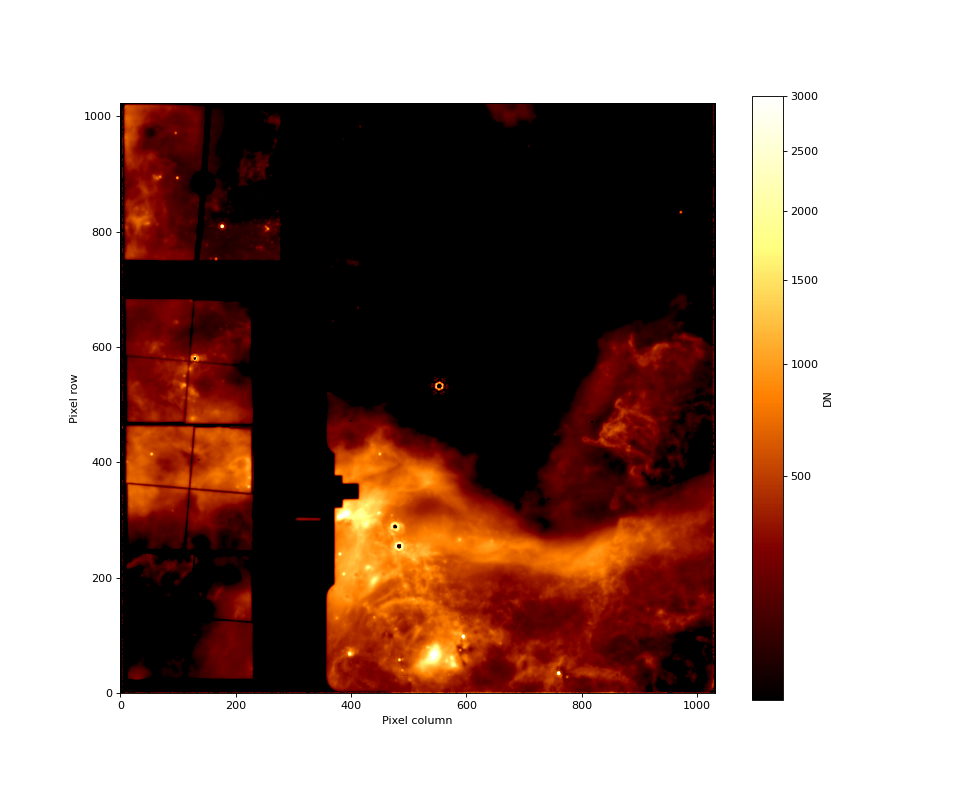

In [14]:
show_image(miri_rate.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

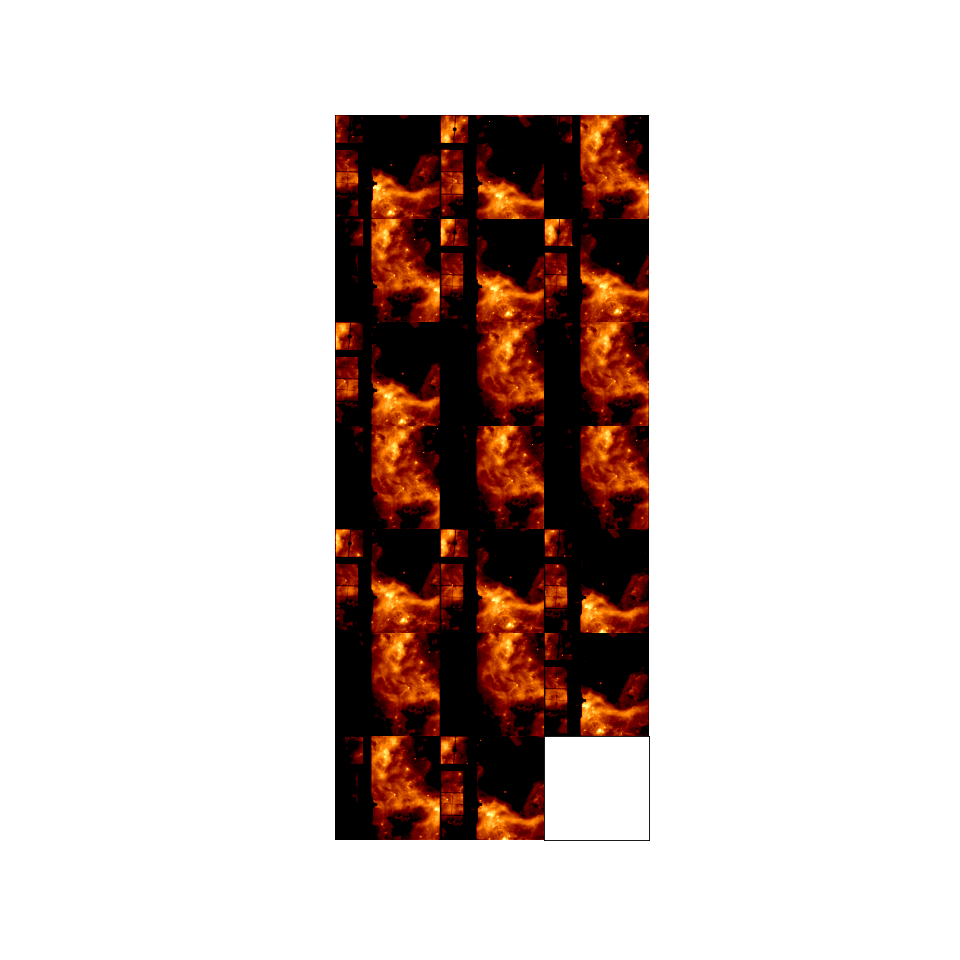

In [15]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_rate_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_rate_files):
    with datamodels.open(cfile) as miri_rate:
        cimage = miri_rate.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE2

In [16]:
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
output_dir = f'./{filter}/stage2'
print(miri_rate_files)

['./F1280W/stage1/jw02729002001_02105_00010_mirimage_fixed_rate.fits', './F1280W/stage1/jw02729002001_02105_00005_mirimage_fixed_rate.fits', './F1280W/stage1/jw02729002002_02105_00006_mirimage_fixed_rate.fits', './F1280W/stage1/jw02729002002_02105_00010_mirimage_fixed_rate.fits', './F1280W/stage1/jw02729002001_02105_00008_mirimage_fixed_rate.fits', './F1280W/stage1/jw02729002001_02105_00004_mirimage_fixed_rate.fits', './F1280W/stage1/jw02729002001_02105_00002_mirimage_fixed_rate.fits', './F1280W/stage1/jw02729002002_02105_00005_mirimage_fixed_rate.fits', './F1280W/stage1/jw02729002002_02105_00002_mirimage_fixed_rate.fits', './F1280W/stage1/jw02729002002_02105_00001_mirimage_fixed_rate.fits', './F1280W/stage1/jw02729002002_02105_00008_mirimage_fixed_rate.fits', './F1280W/stage1/jw02729002002_02105_00003_mirimage_fixed_rate.fits', './F1280W/stage1/jw02729002001_02105_00003_mirimage_fixed_rate.fits', './F1280W/stage1/jw02729002001_02105_00009_mirimage_fixed_rate.fits', './F1280W/stage1/jw

In [17]:
if run_image2:
    miri_image2(miri_rate_files, output_dir, flatfile=flatfile)

2022-07-20 14:54:33,400 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-07-20 14:54:33,401 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None, 'wfss_mmag_extract': None, 'override_wfssbkg': None, 'override_wavelengthrange': None, 'class': ''}


2022-07-20 14:54:33,401 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-07-20 14:54:33,402 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 's

2022-07-20 14:54:34,501 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-20 14:54:34,502 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-20 14:54:34,503 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-20 14:54:34,504 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-20 14:54:34,504 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-20 14:54:34,505 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0784.fits'.
2022-07-20 14:54:34,507 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file 

2022-07-20 14:54:34,532 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-20 14:54:34,532 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-20 14:54:34,532 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-20 14:54:34,532 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-20 14:54:34,533 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02105_00010_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-20 14:54:34,536 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022

2022-07-20 14:54:34,561 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-20 14:54:34,561 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0784.fits'.
2022-07-20 14:54:34,562 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-20 14:54:34,562 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-20 14:54:34,563 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-20 14:54:34,563 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-20 14:54:34,563 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-20 14:54:34,563 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-20 14:54:34,563 - stpipe.Image2Pi

2022-07-20 14:54:34,592 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-20 14:54:34,592 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-20 14:54:34,593 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-20 14:54:34,593 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-20 14:54:34,593 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-20 14:54:34,593 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-20 14:54:34,594 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-20 14:54:34,595 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-20 14:54:34,619 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-20 14:54:34,619 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-20 14:54:34,619 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-20 14:54:34,620 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-20 14:54:34,620 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-20 14:54:34,621 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-20 14:54:34,621 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-20 14:54:34,621 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-20 14:54:34,621 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027290020

2022-07-20 14:54:34,648 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-20 14:54:34,649 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-20 14:54:34,649 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-20 14:54:34,650 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-20 14:54:34,650 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0784.fits'.
2022-07-20 14:54:34,651 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-20 14:54:34,651 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-07-20 14:54:34,676 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-20 14:54:34,676 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-20 14:54:34,676 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-20 14:54:34,677 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02105_00004_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-20 14:54:34,680 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-20 14:54:34,680 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
202

2022-07-20 14:54:34,706 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0784.fits'.
2022-07-20 14:54:34,707 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-20 14:54:34,707 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-20 14:54:34,707 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-20 14:54:34,708 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-20 14:54:34,708 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-20 14:54:34,708 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-20 14:54:34,708 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-20 14:54:34,708 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-07-20 14:54:36,137 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-20 14:54:36,304 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002001_02105_00010_mirimage_fixed_rate.fits>,).
2022-07-20 14:54:36,306 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-20 14:54:36,327 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-20 14:54:36,328 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-20 14:54:36,4

2022-07-20 14:54:42,023 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-20 14:54:42,101 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-20 14:54:42,101 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-20 14:54:42,102 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-20 14:54:42,102 - stpipe.Image2Pipeline.photom - INFO -  filter: F1130W
2022-07-20 14:54:42,142 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-20 14:54:42,144 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-20 14:54:42,144 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-20 14:54:42,145 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 1.18843
2022-07-20 14:54:42,161 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-20 14:54:42,333 - stpipe.Ima

2022-07-20 14:54:47,769 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-20 14:54:47,769 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 1.18843
2022-07-20 14:54:47,785 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-20 14:54:47,961 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00006_mirimage_fixed_rate.fits>,).
2022-07-20 14:54:47,963 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel

2022-07-20 14:54:53,596 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-20 14:54:53,736 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-20 14:54:54,197 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:54:54,527 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-20 14:54:54,986 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:54:55,323 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-20 14:54:55,781 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:54:56,117 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-20 14:54:56,574 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:54:56,924 - stpipe.Image2Pipeline.resample 

2022-07-20 14:55:01,695 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-20 14:55:02,176 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:55:02,529 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  84.643815101 -69.075352601 84.644217514 -69.106747848 84.733114391 -69.106579745 84.732584572 -69.075184739
2022-07-20 14:55:03,229 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1280W/stage2/jw02729002001_02105_00008_mirimage_fixed_i2d.fits
2022-07-20 14:55:03,229 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-20 14:55:03,230 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1280W/stage1/jw02729002001_02105_00008_mirimage_fixed
2022-07-20 14:55:03,231 - stpipe.Image2Pipeline - INFO - Processing product ./F1280W/stage1/jw02729002001_02105_00004_mirimage_fixed
2022-07-20 14:55:03,231 - stpipe.Image2Pipeline - INFO - Working on input ./F1280W/stage1/jw02

2022-07-20 14:55:08,762 - stpipe.Image2Pipeline - INFO - Processing product ./F1280W/stage1/jw02729002001_02105_00002_mirimage_fixed
2022-07-20 14:55:08,762 - stpipe.Image2Pipeline - INFO - Working on input ./F1280W/stage1/jw02729002001_02105_00002_mirimage_fixed_rate.fits ...
2022-07-20 14:55:08,995 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02729002001_02105_00002_mirimage_fixed_rate.fits>,).
2022-07-20 14:55:08,996 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-07-20 14:55:14,694 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-20 14:55:14,772 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  84.587545493 -69.078682767 84.587958398 -69.109962873 84.676062500 -69.109834341 84.676334778 -69.078502324
2022-07-20 14:55:14,772 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.587545493 -69.078682767 84.587958398 -69.109962873 84.676062500 -69.109834341 84.676334778 -69.078502324
2022-07-20 14:55:14,772 - stpipe.Image2

2022-07-20 14:55:20,357 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.592840076 -69.076755690 84.593260135 -69.108035784 84.681356439 -69.107904675 84.681621502 -69.076572649
2022-07-20 14:55:20,357 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-20 14:55:20,422 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-20 14:55:20,615 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00002_mirimage_fixed_rate.fits>,).
2022-07-20 14:55:20,616 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-07-20 14:55:26,296 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:55:26,296 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:55:26,297 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:55:26,302 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:55:26,419 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-20 14:55:26,615 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00001_mirimage_fixed_rate.fits>,).
2022-07-20 14:55:26,616 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-20 14:55:32,263 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00008_mirimage_fixed_rate.fits>,).
2022-07-20 14:55:32,264 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-20 14:55:32,286 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-20 14:55:32,287 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-20 14:55:32,366 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-20 14:55:32

2022-07-20 14:55:38,144 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-20 14:55:38,223 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-20 14:55:38,223 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-20 14:55:38,224 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-20 14:55:38,224 - stpipe.Image2Pipeline.photom - INFO -  filter: F1130W
2022-07-20 14:55:38,264 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-20 14:55:38,265 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-20 14:55:38,266 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-20 14:55:38,266 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 1.18843
2022-07-20 14:55:38,282 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-20 14:55:38,483 - stpipe.Ima

2022-07-20 14:55:44,029 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-20 14:55:44,030 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 1.18843
2022-07-20 14:55:44,046 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-20 14:55:44,249 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02729002001_02105_00003_mirimage_fixed_rate.fits>,).
2022-07-20 14:55:44,251 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixel

2022-07-20 14:55:50,042 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-20 14:55:50,202 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-20 14:55:50,669 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:55:50,999 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-20 14:55:51,468 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:55:51,802 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-20 14:55:52,269 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:55:52,607 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-20 14:55:53,076 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:55:53,427 - stpipe.Image2Pipeline.resample 

2022-07-20 14:55:58,330 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-20 14:55:58,803 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-20 14:55:59,159 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  84.652327836 -69.077441815 84.652742551 -69.108837042 84.741647844 -69.108664514 84.741105698 -69.077269534
2022-07-20 14:55:59,936 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1280W/stage2/jw02729002001_02105_00006_mirimage_fixed_i2d.fits
2022-07-20 14:55:59,936 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-20 14:55:59,937 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1280W/stage1/jw02729002001_02105_00006_mirimage_fixed
2022-07-20 14:55:59,938 - stpipe.Image2Pipeline - INFO - Processing product ./F1280W/stage1/jw02729002002_02105_00009_mirimage_fixed
2022-07-20 14:55:59,938 - stpipe.Image2Pipeline - INFO - Working on input ./F1280W/stage1/jw02

2022-07-20 14:56:05,716 - stpipe.Image2Pipeline - INFO - Processing product ./F1280W/stage1/jw02729002002_02105_00004_mirimage_fixed
2022-07-20 14:56:05,717 - stpipe.Image2Pipeline - INFO - Working on input ./F1280W/stage1/jw02729002002_02105_00004_mirimage_fixed_rate.fits ...
2022-07-20 14:56:05,979 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00004_mirimage_fixed_rate.fits>,).
2022-07-20 14:56:05,981 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-07-20 14:56:11,929 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-20 14:56:12,019 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  84.654380055 -69.076406376 84.655090445 -69.107685801 84.743183423 -69.107450557 84.743157667 -69.076118391
2022-07-20 14:56:12,020 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.654380055 -69.076406376 84.655090445 -69.107685801 84.743183423 -69.107450557 84.743157667 -69.076118391
2022-07-20 14:56:12,020 - stpipe.Image2

2022-07-20 14:56:17,782 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.602242619 -69.076597786 84.602676085 -69.107877857 84.690771685 -69.107741939 84.691023316 -69.076409899
2022-07-20 14:56:17,782 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-20 14:56:17,848 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-20 14:56:18,066 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02729002002_02105_00007_mirimage_fixed_rate.fits>,).
2022-07-20 14:56:18,067 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-07-20 14:56:24,025 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:56:24,026 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:56:24,027 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:56:24,033 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-20 14:56:24,155 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-20 14:56:24,375 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002001_02105_00001_mirimage_fixed_rate.fits>,).
2022-07-20 14:56:24,377 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-20 14:56:38,252 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02729002002_02105_00003_mirimage_fixed_cal.fits
2022-07-20 14:56:39,010 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02729002001_02105_00003_mirimage_fixed_cal.fits
2022-07-20 14:56:39,738 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02729002001_02105_00009_mirimage_fixed_cal.fits
2022-07-20 14:56:40,540 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02729002001_02105_00006_mirimage_fixed_cal.fits
2022-07-20 14:56:41,275 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02729002002_02105_00009_mirimage_fixed_cal.fits
2022-07-20 14:56:42,035 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02729002002_02105_00004_mirimage_fixed_cal.fits
2022-07-20 14:56:42,810 - stpipe.Image2Pipeline - INFO - Saved model in ./F1280W/stage2/jw02729002001_02105_00007_mirimage_fixed_cal.fits
2022-07-20 14:56:43,673 - stpipe.I

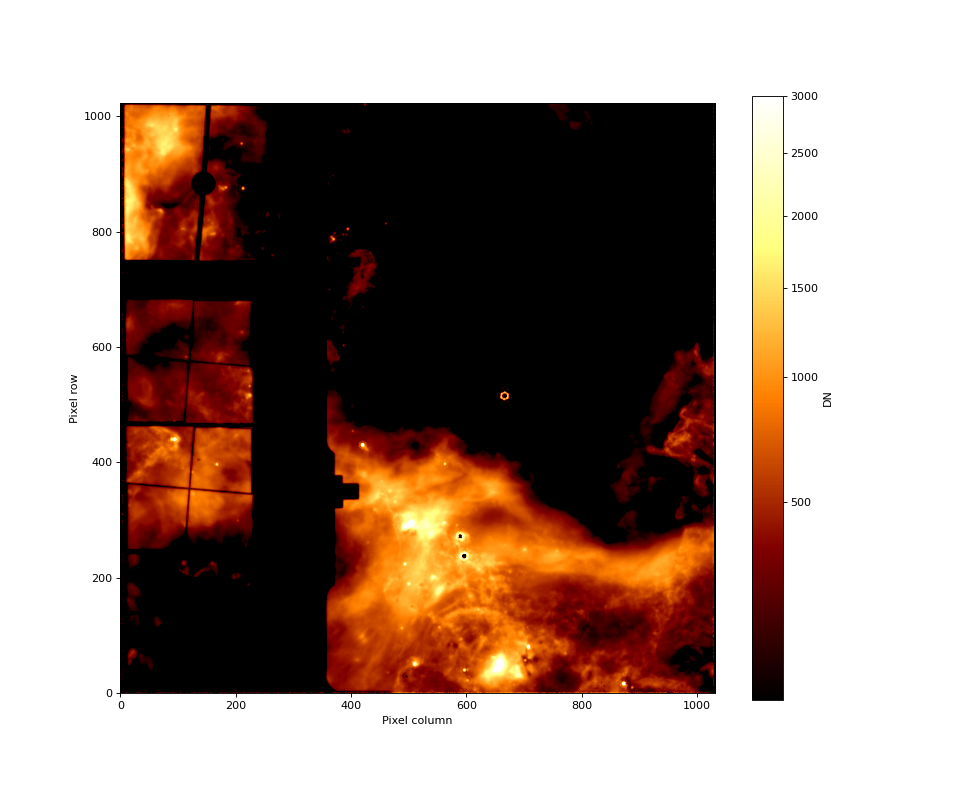

In [18]:
drange = drange_cal
# look at one of the images
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_cal.fits")
miri_cal = datamodels.open(miri_cal_files[0])
show_image(miri_cal.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

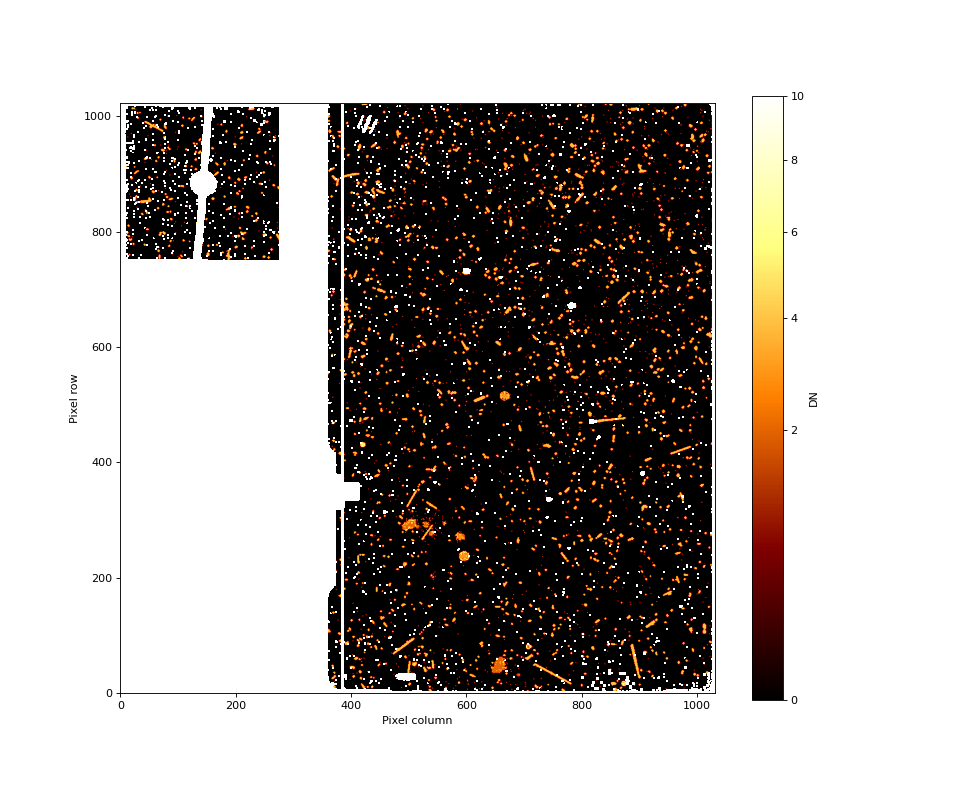

In [19]:
show_image(miri_cal.dq, 0, 10, dmap=dmap)

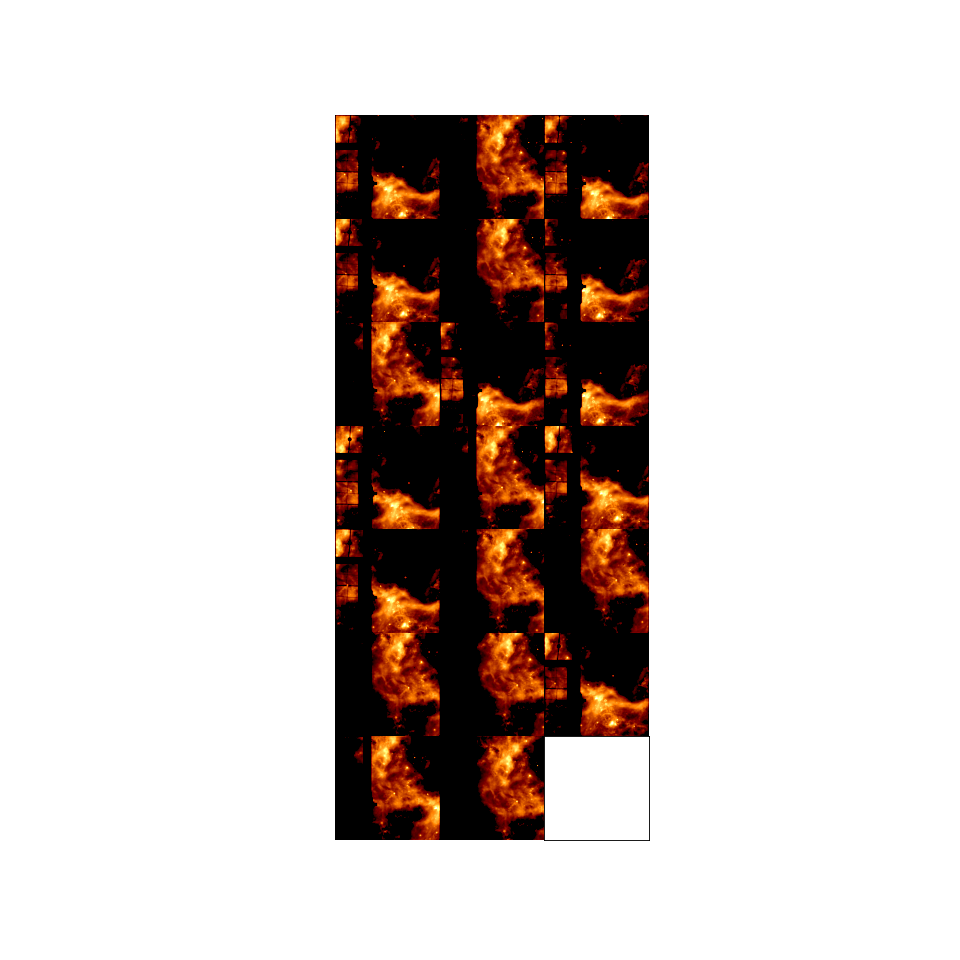

In [20]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_cal_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_cal_files):
    with datamodels.open(cfile) as miri_cal:
        cimage = miri_cal.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE3

In [21]:
# update the WCS for mosaic tile 1
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}1*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile1_shifts)

# update the WCS for mosaic tile 2
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile2_shifts)

In [22]:
miri_cal_files = glob.glob(f"./{filter}/stage2/j*ge_fixed_wcs_cal.fits")
output_dir = f"./{filter}/stage3/"
print(miri_cal_files)

if rotation is not None:
    miri_asn_name = f'miri_{filter}_stage3_fixedrot_asn'
else: 
    miri_asn_name = f'miri_{filter}_stage3_asn'
miri_asn = asn_from_list.asn_from_list(miri_cal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

miri_asn_file = f'{miri_asn_name}.json'
with open(miri_asn_file, 'w') as outfile:
    name, serialized = miri_asn.dump(format='json')
    outfile.write(serialized)
    
print(miri_asn_file)

['./F1280W/stage2/jw02729002001_02105_00007_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02729002002_02105_00003_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02729002002_02105_00001_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02729002001_02105_00010_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02729002001_02105_00009_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02729002001_02105_00006_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02729002001_02105_00001_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02729002002_02105_00010_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02729002002_02105_00008_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02729002002_02105_00006_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02729002001_02105_00008_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02729002002_02105_00004_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02729002002_02105_00007_mirimage_fixed_wcs_cal.fits', './F1280W/stage2/jw02729002002_02105_00002_mirimag

In [23]:
if run_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg, 
                crval=crval, rotation=rotation, 
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-07-20 14:57:22,074 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-07-20 14:57:22,075 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-20 14:57:22,075 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-07-20 14:57:22,076 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-07-20 14:57:22,538 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-20 14:57:22,539 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-07-20 14:57:26,568 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-07-20 14:57:26,569 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 3.7, 'snr_threshold': 5, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 5, 'searchrad': 5.0, 'use2dhist': True, 'separation': 1.0, 'tolerance': 0.7, 'xoffset': 

2022-07-20 14:58:07,009 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 4654 (0.44%)
2022-07-20 14:58:07,080 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 11055 (1.05%)
2022-07-20 14:58:07,149 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 24542 (2.32%)
2022-07-20 14:58:07,220 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 14149 (1.34%)
2022-07-20 14:58:07,290 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 19084 (1.81%)
2022-07-20 14:58:07,360 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 12126 (1.15%)
2022-07-20 14:58:07,432 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 2358 (0.22%)
2022-07-20 14:58:07,504 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 8719 (0.83%)
2022-07-20 14:58:07,575 - stpipe.Im

2022-07-20 14:58:50,513 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-20 14:58:51,461 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-20 14:58:52,406 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-20 14:58:53,343 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-20 14:58:54,280 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-20 14:58:55,223 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-20 14:58:55,556 - stpipe.Image3Pipeline.resample - INFO - Resampling var_rnoise
2022-07-20 14:58:56,165 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-20 14:58:57,118 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-20 14:58:58,071 - stpipe.Image3Pipeline.resample - INFO 

2022-07-20 14:59:54,424 - stpipe.Image3Pipeline.source_catalog - INFO - Using APCORR reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_apcorr_0008.fits
2022-07-20 14:59:54,433 - stpipe.Image3Pipeline.source_catalog - INFO - Using ABVEGAOFFSET reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_abvegaoffset_0001.asdf
2022-07-20 14:59:54,434 - stpipe.Image3Pipeline.source_catalog - INFO - Instrument: MIRI
2022-07-20 14:59:54,434 - stpipe.Image3Pipeline.source_catalog - INFO - Detector: MIRIMAGE
2022-07-20 14:59:54,434 - stpipe.Image3Pipeline.source_catalog - INFO - Filter: F1130W
2022-07-20 14:59:54,435 - stpipe.Image3Pipeline.source_catalog - INFO - Subarray: FULL
2022-07-20 14:59:54,499 - stpipe.Image3Pipeline.source_catalog - INFO - AB to Vega magnitude offset 5.49349
2022-07-20 14:59:54,585 - stpipe.Image3Pipeline.source_catalog - INFO - Background could not be estimated in meshes. Using the entire unmasked array for background estimation: bk

In [24]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_catalog_file = output_dir + miri_asn_name + '_cat.ecsv'

In [25]:
# Open the mosaic image
miri_mosaic = datamodels.open(miri_mosaic_file)

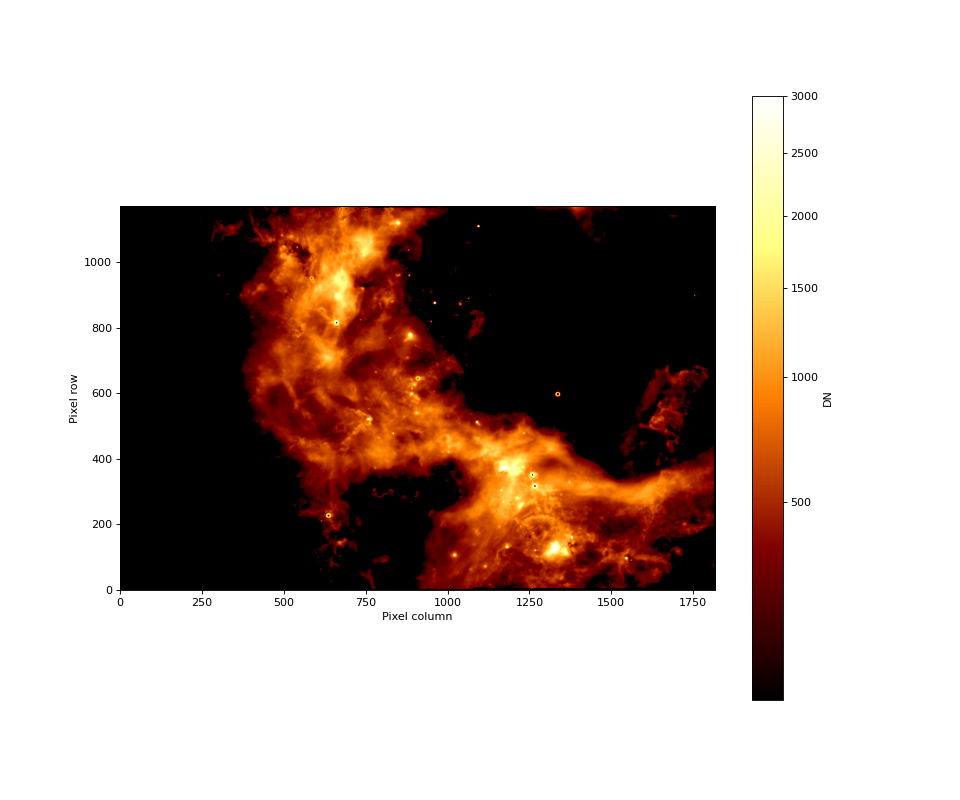

In [26]:
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

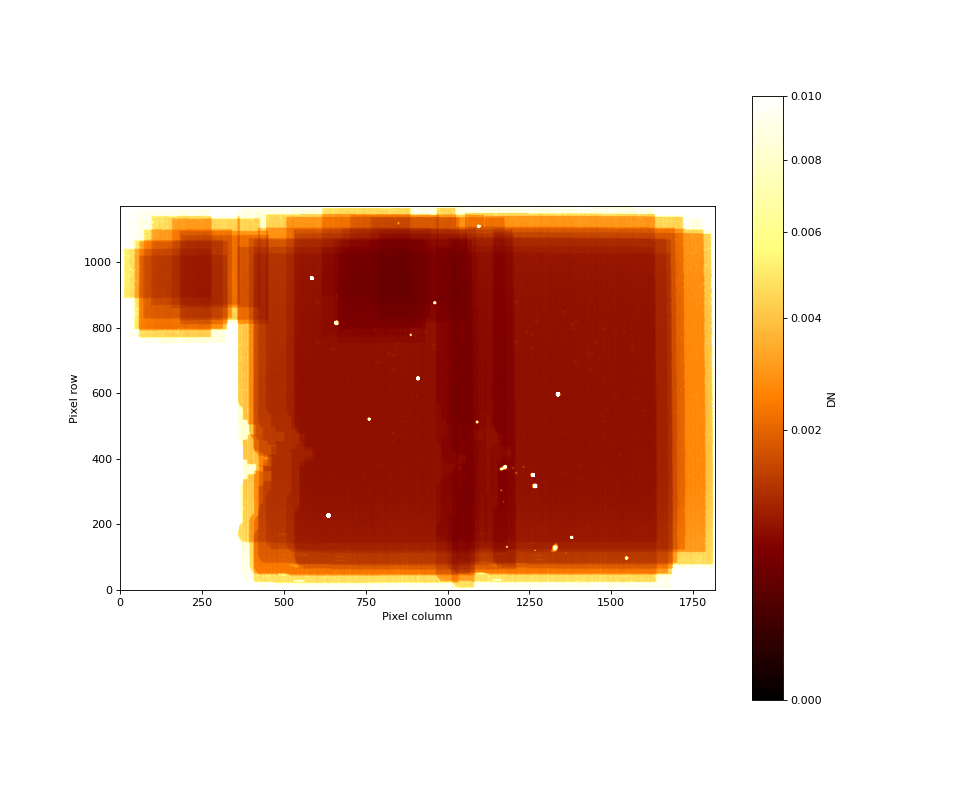

In [27]:
# Look at the mosaic data read noise uncertainties (i.e., coverage map)
show_image(miri_mosaic.var_rnoise, vmin=0.0, vmax=0.01, dmap=dmap)

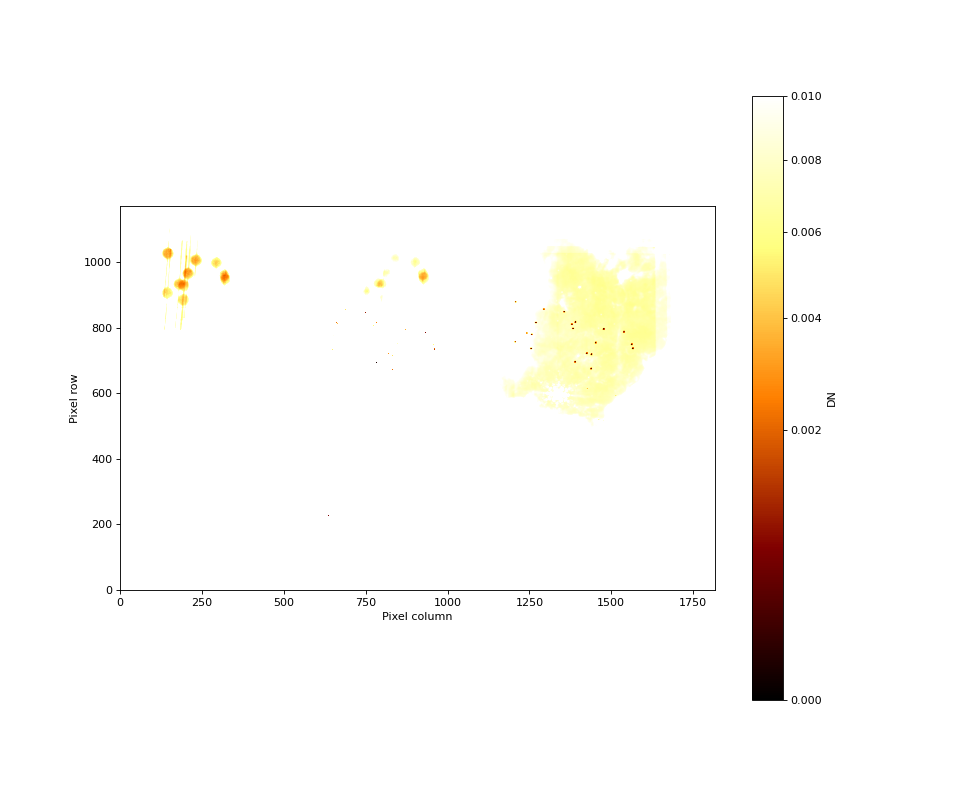

In [28]:
# Look at the mosaic data poisson uncertainties
show_image(miri_mosaic.var_poisson, vmin=0, vmax=0.01, dmap=dmap)

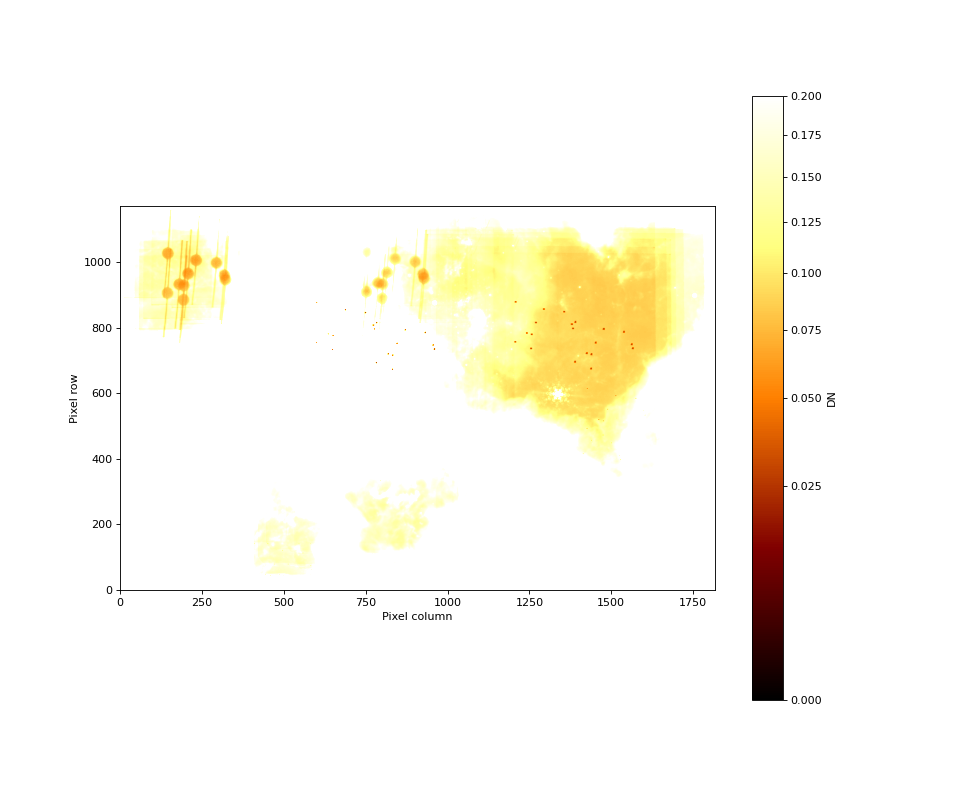

In [29]:
# Look at the mosaic total data uncertainties
show_image(miri_mosaic.err, vmin=0, vmax=0.2, dmap=dmap)

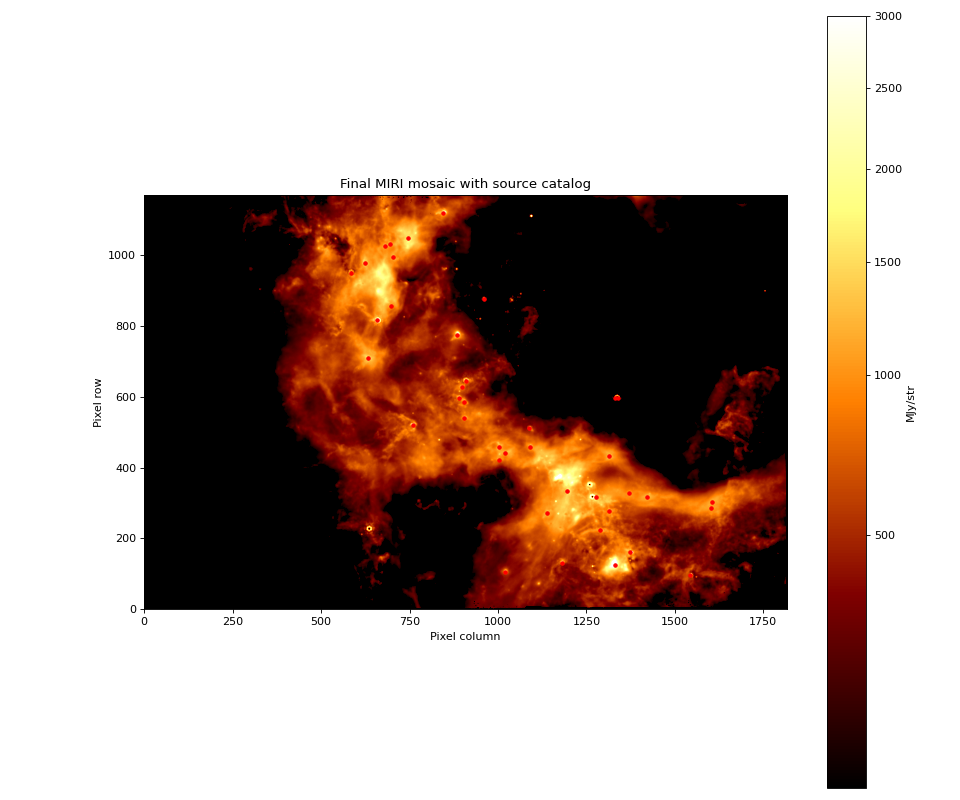

In [30]:
if os.path.isfile(miri_catalog_file):
    # Read in the source catalog
    miri_source_cat = ascii.read(miri_catalog_file)
    # Show the catalog sources on the mosaic
    overlay_catalog(miri_mosaic.data, miri_source_cat, flux_limit=5e-7, vmin=drange[0], vmax=drange[1],
                    title='Final MIRI mosaic with source catalog', dmap=dmap)